In [28]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt 

def load_img(path, color=True):
    '''Loads the image from given path'''
    if color:
        img = cv.imread(path, cv.IMREAD_COLOR)
        # img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    else:
        img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    
    return img

def show_cv(img, title = 'image'):
    cv.namedWindow(title, cv.WINDOW_AUTOSIZE)
    cv.imshow(title, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

def plot(p, title = 'plot'):
    '''
    Plots a given plot and saves it to output images
    '''
    dir = 'Assignment1/output_images/' + title + '.png'
    plt.plot(p)
    plt.title(title)
    plt.savefig(dir)
    plt.show()

def show(img, title = 'image'):
    '''Displays a given image and saves it to output images'''
    dir = 'Assignment1/output_images/' + title + '.png'
    cv.imwrite(dir, img)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img, cmap = 'gray')
    plt.title(title)
    plt.show()

def ssd(A,B):
    s = np.sum((A-B)**2) / (A.size)
    return s

In [5]:
emma_g = load_img('Assignment1/a01images/emma.jpg', False)
emma_c = load_img('Assignment1/a01images/emma.jpg', True)
emma_c = cv.resize(emma_c, (240,270))
emma_g = cv.resize(emma_g, (240,270))

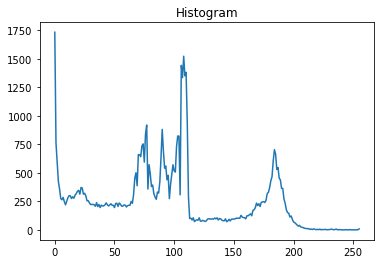

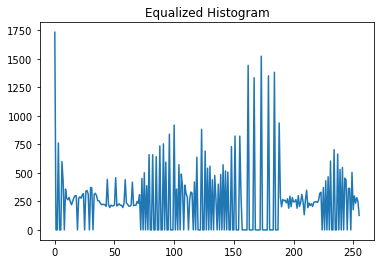

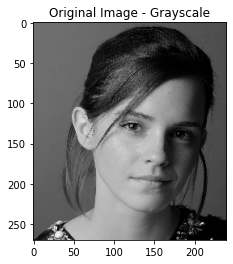

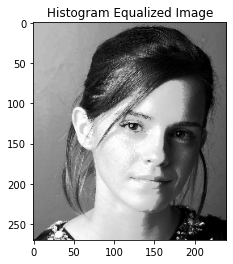

In [7]:
# Histogram Calculation
hist_emma = cv.calcHist([emma_g],[0], None, [256], [0,256])
plot(hist_emma, 'Histogram')
eq_emma = cv.equalizeHist(emma_g)
eq_hist = cv.calcHist([eq_emma],[0], None, [256], [0,256])
plot(eq_hist, 'Equalized Histogram')
show(emma_g, 'Original Image - Grayscale')
show(eq_emma, "Histogram Equalized Image")


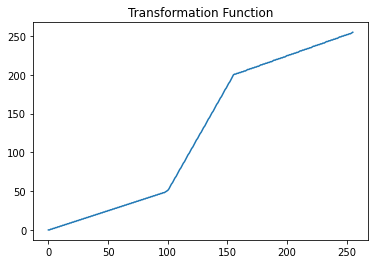

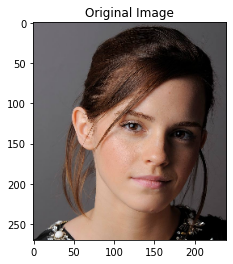

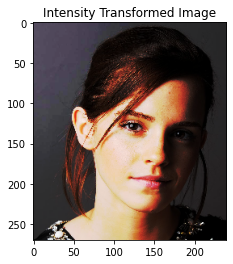

In [8]:
# Intensity Transformation
p, q= 50,200

tr1 = np.linspace(0,p,100, dtype=np.uint8)
tr2 = np.linspace(p+1,q,56, dtype=np.uint8)
tr3 = np.linspace(q+1,255,100, dtype=np.uint8)
transform = np.concatenate((np.concatenate((tr1, tr2), axis = 0), tr3), axis = 0)
plot(transform, 'Transformation Function')
emma_transformed = cv.LUT(emma_c, transform)
show(emma_c, 'Original Image')
show(emma_transformed, 'Intensity Transformed Image')



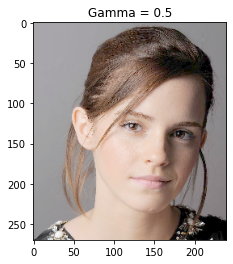

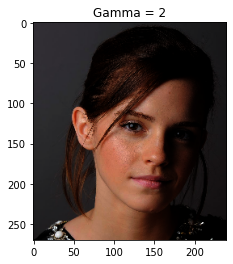

In [9]:
# gamma Corection
def gamma_correct(img, gamma):
    table = np.array([(x/255.0)**gamma*255.0 for x in np.arange(0,256)], dtype = np.uint8)
    gamma_img = cv.LUT(emma_c, table)
    return gamma_img
gamma_emma = gamma_correct(emma_c, 0.5)
gamma_emma1=  gamma_correct(emma_c, 2)

show(gamma_emma, 'Gamma = 0.5')
show(gamma_emma1, 'Gamma = 2')

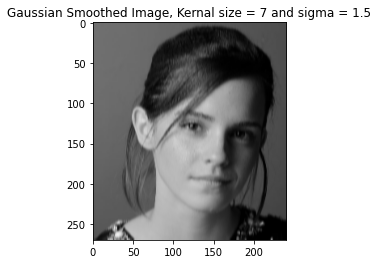

In [16]:
# Gaussian Smoothing

k_size = 7
sigma = 1.5
kernel = cv.getGaussianKernel(k_size, sigma)

gauss_emma = cv.filter2D(emma_g, -1, kernel)
gauss_emma_builtin = cv.GaussianBlur(emma_g, (7,7), 1.5)

show(gauss_emma, 'Gaussian Smoothed Image, Kernal size = 7 and sigma = 1.5')


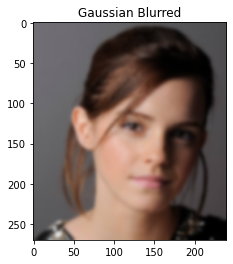

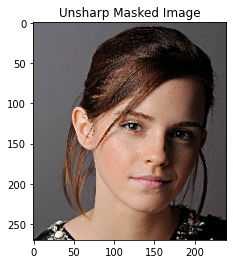

In [11]:
# Unsharp Masking

gaussian = cv.GaussianBlur(emma_c, (0, 0), 2.0)
unsharp_image = cv.addWeighted(emma_c, 1.5, gaussian, -0.5, 0, emma_c)


show(gaussian, 'Gaussian Blurred')
show(unsharp_image, 'Unsharp Masked Image')





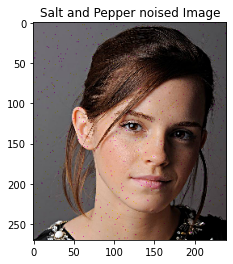

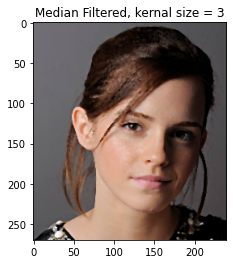

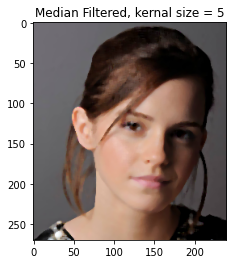

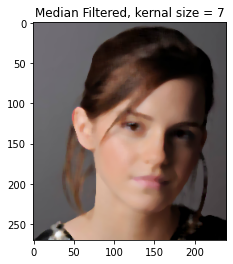

In [17]:
# Median Filtering
def noisy(image):
    '''Adds salt and pepper noise to an image'''
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.004
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

emma_sp = noisy(emma_c)
emma_med = cv.medianBlur(emma_sp,3)
emma_med1 = cv.medianBlur(emma_sp, 5)
emma_med2 = cv.medianBlur(emma_sp, 7)
show(emma_sp, 'Salt and Pepper noised Image')
show(emma_med, 'Median Filtered, kernal size = 3')
show(emma_med1, 'Median Filtered, kernal size = 5')
show(emma_med2, 'Median Filtered, kernal size = 7')

In [13]:
# Bilateral Filtering


101


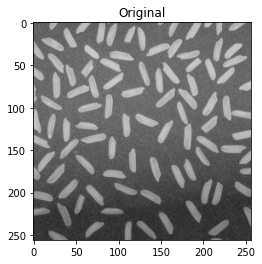

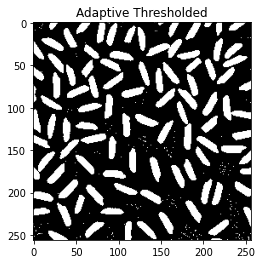

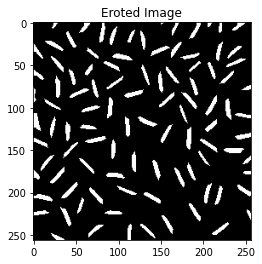

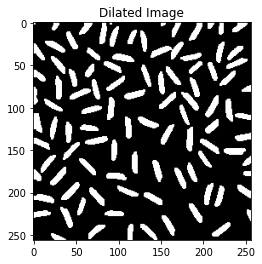

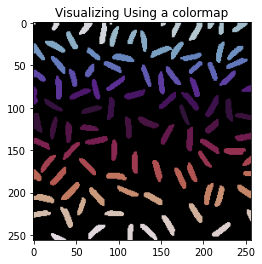

In [21]:
# Q2 - Counting rice grains

rice_original = load_img('Assignment1/a01images/rice.png', color = False)
rice_thres = cv.adaptiveThreshold(rice_original, 255.0, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 25, -10.0)
rice_eroted = cv.erode(rice_thres, np.ones((2,2)), iterations = 3)
rice_dilated = cv.dilate(rice_eroted, np.ones((2,2)), iterations = 2)

num_labels, rice_out = cv.connectedComponents(rice_dilated)

print(num_labels)
show(rice_original, 'Original')
show(rice_thres, "Adaptive Thresholded")
show(rice_eroted, 'Eroted Image')
show(rice_dilated, 'Dilated Image')

(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(rice_out)
rice_out = (255/(maxVal-minVal)) * (rice_out - minVal)
rice_colored = cv.applyColorMap(rice_out.astype('uint8'), cv.COLORMAP_TWILIGHT)
rice_colored[rice_out==0] = 0

show(rice_colored, 'Visualizing Using a colormap')
# plt.imshow(rice_out)
# cv.imwrite('Assignment1/output_images/rice_out.png', rice_out)
# plt.title('Connected Components')
# plt.show()
# print(rice_out)



In [15]:
def zoom_nearest(img, factor):
    '''Zooms the Given image using nearest neighbour interpolation
    img - image to be zoomed
    factor - zooming factor(float accepted)
    '''
    channels = len(img.shape)
    if channels == 2:
        row, col = img.shape
        new_row, new_col = int(row * factor), int(col * factor)
        zoomed_img = np.zeros((new_row, new_col), dtype=np.uint8)
        
    elif channels == 3:
        row, col, channel = img.shape
        new_row, new_col = int(row * factor), int(col * factor)
        zoomed_img = np.zeros((new_row, new_col, channel), dtype = np.uint8)
        
    for i in range(new_row):
        for j in range(new_col):
            x, y = int(np.round(i/factor)), int(np.round(j/factor))
            if x>= row :
                x = row-1
            if y >= col:
                y = col - 1
            assert(x < row and y < col)
            zoomed_img[i][j] = img[x][y]

    return zoomed_img

In [ ]:
def zoom_bilinear(img, factor):
    channels = len(img.shape)
    if channels == 2:
        row, col = img.shape
        new_row, new_col = int(row * factor), int(col * factor)
        zoomed_img = np.zeros((new_row, new_col), dtype=np.uint8)    
    elif channels == 3:
        row, col, channel = img.shape
        new_row, new_col = int(row * factor), int(col * factor)
        zoomed_img = np.zeros((new_row, new_col, channel), dtype = np.uint8)
    
    for i in range(new_row):
        for j in range(new_col):
            x_f, y_f = (i)/factor  , (j)/factor  
            x, y = int(x_f), int(y_f)
            x_plus1, y_plus1 = min(x+1, row-1),  min(y+1, col-1)
            x_diff, y_diff = x_f - x, y_f- y
            
            f1 = np.array(img[x][y])
            f2 =  np.array(img[x_plus1][y])
            f3 =  np.array(img[x][y_plus1])
            f4 =  np.array(img[x_plus1][y_plus1])

            f_y1 = (1. - x_diff) * f1 + x_diff * f2
            f_y2 = (1. - x_diff) * f3 + x_diff * f4
            f_xy = (1. - y_diff) * f_y1 + y_diff * f_y2
            zoomed_img[i][j] = (f_xy+0.5).astype('uint8')
    return zoomed_img

In [29]:
sum_squared_difference = {}
nearest_builtin_ssd = {}
for i in range(1,10):
    dir = 'Assignment1/a01images/im0' + str(i) + '.png'
    large_img = load_img(dir, True)
    dir1= 'Assignment1/a01images/im0' +str(i) + 'small.png'
    small_img = load_img(dir1, True)
    zoomed_img_nearest = zoom_nearest(small_img, 4)
    zoomed_builtin_nearest = cv.resize(small_img, (large_img.shape[1],large_img.shape[0]), interpolation = cv.INTER_NEAREST)
    zoomed_img_bilinear = zoom_bilinear(small_img, 4)
    zoomed_builtin_bilinear = cv.resize(small_img, (large_img.shape[1],large_img.shape[0]), interpolation = cv.INTER_LINEAR)
    if (large_img.shape == zoomed_img_nearest.shape):
        sum_squared_difference['image' + str(i)] = (ssd(large_img, zoomed_img_nearest), 
                                                    ssd(large_img, zoomed_builtin_nearest),
                                                    ssd(large_img, zoomed_img_bilinear),
                                                    ssd(large_img, zoomed_builtin_bilinear) )
        #nearest_builtin_ssd['image' + str(i)] = ssd(large_img, zoomed_builtin)
    
    
print(sum_squared_difference)


{'image1': (40.11174270190329, 31.284316486625514, 39.391648019547326, 31.053094618055557), 'image2': (16.792970920138888, 11.902013310185184, 16.31443706597222, 10.682991753472223), 'image4': (81.75742818447787, 78.73781724215534, 81.61630316840278, 79.30171505272634), 'image5': (54.603041956018515, 50.57724609375, 53.79682436342593, 50.78901866319445), 'image6': (34.94239551183128, 30.553995949074075, 35.744030671296294, 31.78531153549383), 'image7': (30.578660888671877, 27.964142659505207, 30.425485026041667, 28.564422037760416), 'image9': (28.086949305555557, 21.148100694444445, 26.855516666666666, 19.14054826388889)}
